# The curse of dimensionality


Here is a function that depends on time $t$ and 3 other parameters. 

In this example class we generate many samples of the function and 
then try to build an interpolator that approximates this function as accurately as possible.

You can think of this function as a time series that depends on paramaters $a,b,c$.

In this problem class, we will assume the ranges of the parameters are:

- $0<a<1$

- $-0.5<b<0.5$

- $5<c<10$


When not varied we will fix the values to $a=0.1$, $b=-0.13$, $c=9$.


We will always assume time $t$ is between 0 and 1. Our time grid is `t = np.linspace(0, 1, 100)`, unless otherwise requested.


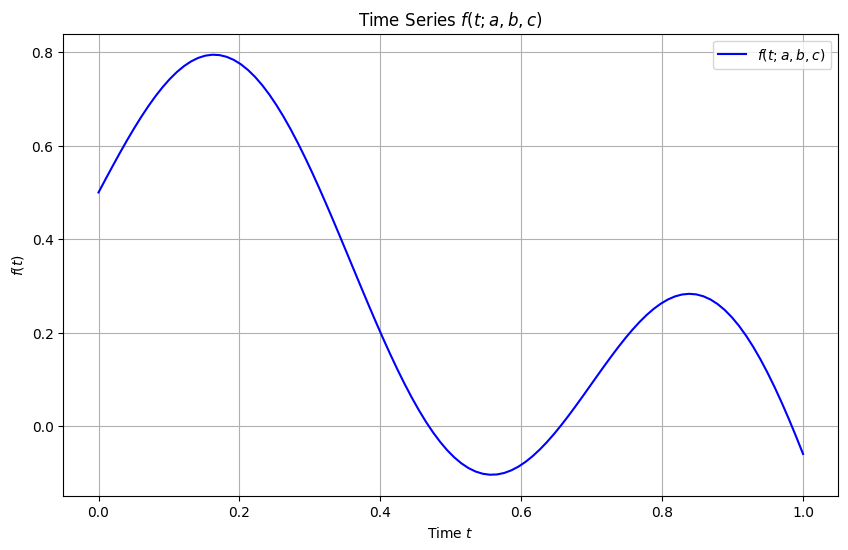

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Example usage
# Define parameters
a = 0.1
b = -0.13
c = 9


# Define time range
t = np.linspace(0, 1, 100)  # time from 0 to 10 with 100 points

# Calculate f(t) for these parameters
f_values = f(t, a, b, c)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Time Series $f(t; a, b, c)$')
plt.legend()
plt.grid(True)
plt.show()


You can make a widget plot and play with different parameter values.  

In [3]:
from ipywidgets import interactive
import ipywidgets as widgets


def plot_with_parameters(a, b, c):
    # Define time range
    t = np.linspace(0, 1, 100)
    
    # Calculate f(t) for these parameters 
    f_values = f(t, a, b, c)
    
    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

The goal of this problem class is to sample this function across all its parameter space and create interpolators. 

You should aim to understand the limitations of interpolation and how to deal with this very important problem. 

## Question 1

Consider all parameter values (except $t$) are fixed and create an interpolator with respect to time $t$. 

You use the original grid for the interpolation. 

In [7]:
t = np.linspace(0, 1, 100)

## Question 2

Evaluate the interpolator on a much finer grid than the original $t$ grid. 

## Question 3

Show the results of question 2 in a plot, showing both the exact function and the predictions of the interpolator. 

## Question 4

Show the ratio of the interpolated values to true values accross the fine time grid. 

What do you observe? Does it make sense?


## Question 5

Consider now all paramaters fixed except $a$ (and $t$). 

We assume the parameter $a$ can take values between 0 and 1.

Generate 10 samples of $f$ (i.e., 10 time series)  corresponding to linearly spaced values of $a$ spanning the interval.

Store them in a `pandas` DataFrame and plot them with the `plot` method of the DataFrame. 


## Question 6 

Create an interpolator that interpolates over $a$ (same range as previous question) and returns the full time series (i.e., values of $f$ for all time points) over the original time grid, i.e., $t$. 

In [8]:
t = np.linspace(0, 1, 100)

Plot the result for $a=0.125$, like in  question 3.

Plot the ratio, like in question 4. 

## Question 7

Use `widgets` from `ipywidgets` to create a sliding scale of `a` values. 

In this question, you should plot the ratio between the interpolated values and the true values of the function evaluated at the original time grid $t$. 




## Question 8

From your results of Question 7, what do you observe? Does it make sense?


## Question 9 

We will now consider both $a$ and $b$ as interpolation parameters. 


Our interpolator should therefore interpolate accross both $a$ and $b$ ranges. 

Generate $10^2$ parameter value pairs $(a,b)$ in the range $0<a<1$ and $-0.5<b<0.5$ using [latin hyper cube](https://pythonhosted.org/pyDOE/randomized.html) sampling. 


Show the $a$ and $b$ samples as a 2D scatter plot. 


## Question 10

For comparison, on the same plot, add a uniformly sampled realization of $10^2$ $a$ and $b$ values.


Can you distinguish by eye? 

As an extension question, think of how you would proceed if 
you needed to prove that these samples come from different generative processes (uniform or Latin Hyper Cube). 

## Question 11


Create the interpolator over the parameter space $(a,b)$, interpolating over samples of the function evaluated at the original time grid $t$.

As you will realise, we are dealing with an irregular grid and need the `griddata` method ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)).  

## Question 12 

Show results with a sliding scale plot for $a$ and $b$.

On a different sliding bar plot, show the ratio between the interpolated values and the true values of the function evaluated at the original time grid $t$. 

What do you observe? 

Does it make sense? 

## Question 13

Compare memory and time of (i) the original function call and (ii) the interpolator call. 

Comment. 

## Question 14

Add a third parameter, $c$ to our interpolation problem and repeat questions 9 to 13. 

For this parameter, use a range of $5<c<10$. 

Comment on the results. 

## Question 15

Instead of interpolating with the griddata method, use (i) a gaussian process, and (ii) a neural network whose output layer is the function predicted at the $10^2$ points of the time grid and input layer is a,b,c values.  

What do you observe in terms of (i) time and (ii) memory? Comment on scalability in all cases covered. 


**Tips**: For the neural net part of this question use Google Colab and the GPUs there. Training should take a few minutes. A good idea for you to practice is also to use CSD3 to solve this question.
